9. Grow a forest by following these steps:
a. Continuing the previous exercise, generate 1,000 subsets of the training set,
each containing 100 instances selected randomly. Hint: you can use ScikitLearn’s ShuffleSplit class for this.
b. Train one decision tree on each subset, using the best hyperparameter values
found in the previous exercise. Evaluate these 1,000 decision trees on the test
set. Since they were trained on smaller sets, these decision trees will likely
perform worse than the first decision tree, achieving only about 80% accuracy.
c. Now comes the magic. For each test set instance, generate the predictions of
the 1,000 decision trees, and keep only the most frequent prediction (you can
use SciPy’s mode() function for this). This approach gives you majority-vote
predictions over the test set.
d. Evaluate these predictions on the test set: you should obtain a slightly higher
accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,
you have trained a random forest classifier!


# Exercise 1
What is the approximate depth of a decision tree trained (without restrictions)
on a training set with one million instances?


log2(1000000) ≈ 20

# Exercise 2
Is a node’s Gini impurity generally lower or higher than its parent’s? Is it generally
lower/higher, or always lower/higher?

Generally the node's Gini impurity is lower than its parents.

# Exercise 3
If a decision tree is overfitting the training set, is it a good idea to try decreasing
max_depth?

Yes, it is a good idea.

# Exercise 4
If a decision tree is underfitting the training set, is it a good idea to try scaling the
input features?

It is irrelevant to decision tree if features are scaled or not so it won't do much to a model.

# Exercise 5
If it takes one hour to train a decision tree on a training set containing one
million instances, roughly how much time will it take to train another decision
tree on a training set containing ten million instances? Hint: consider the CART
algorithm’s computational complexity.

10_000_000*log2(10_000_000) = 232_534_966.642
1_000_000*log2(1_000_000) = 19_931_568.5693
232_534_966.642 / 19_931_568.5693 = 11.6666666667

it will take almost 12 hours </br> 

# Exercise 6
If it takes one hour to train a decision tree on a given training set, roughly how
much time will it take if you double the number of features?

 </br>
it will take two hours

# Exercise 7
Train and fine-tune a decision tree for the moons dataset by following these
steps:
- a. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.
- b. Use train_test_split() to split the dataset into a training set and a test set.
- c. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.
- d. Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
accuracy.

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train[:5], y_train[:5]

(array([[-0.91195857, -1.05164133],
        [ 2.17244965,  0.23519365],
        [ 0.42831506,  1.6179    ],
        [ 2.12945646,  0.15345191],
        [ 0.05195261, -0.28025876]]),
 array([1, 1, 0, 1, 1]))

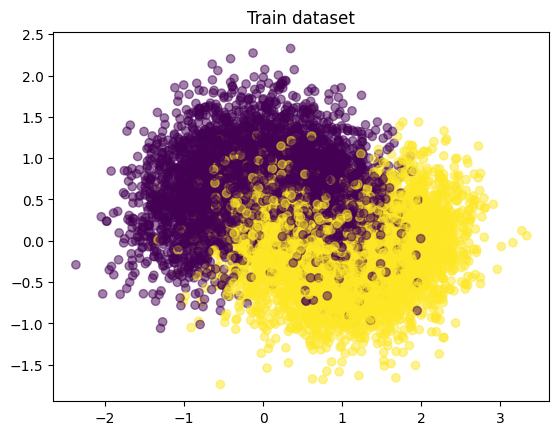

In [13]:
from matplotlib import pyplot as plt

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5)
plt.title("Train dataset")
plt.show()

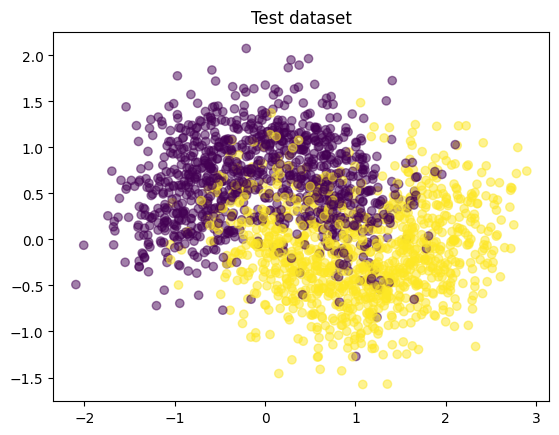

In [15]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.5)
plt.title("Test dataset")
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_leaf_nodes" : [5, 10, 20, 30, 40, 50, 100],
    "min_samples_split" : [5, 10, 20, 50, 100, 200, 300],
    "min_samples_leaf" : [5, 10, 20, 50, 100, 200, 300]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200, 300],
                         'min_samples_split': [5, 10, 20, 50, 100, 200, 300]},
             scoring='accuracy')

In [24]:
grid_search.best_params_, grid_search.best_score_

({'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 5},
 0.8475007297006104)

In [26]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes=50, min_samples_leaf=50, min_samples_split=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=50, min_samples_leaf=50,
                       min_samples_split=5)

In [27]:
tree_clf.score(X_test, y_test)

0.8535

# Exercise  8
Grow a forest by following these steps:
- a. Continuing the previous exercise, generate 1,000 subsets of the training set,
each containing 100 instances selected randomly. Hint: you can use ScikitLearn’s ShuffleSplit class for this.
- b. Train one decision tree on each subset, using the best hyperparameter values
found in the previous exercise. Evaluate these 1,000 decision trees on the test
set. Since they were trained on smaller sets, these decision trees will likely
perform worse than the first decision tree, achieving only about 80% accuracy.
- c. Now comes the magic. For each test set instance, generate the predictions of
the 1,000 decision trees, and keep only the most frequent prediction (you can
use SciPy’s mode() function for this). This approach gives you majority-vote
predictions over the test set.
- d. Evaluate these predictions on the test set: you should obtain a slightly higher
accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,
you have trained a random forest classifier!


In [89]:
from sklearn.model_selection import ShuffleSplit

n_splits = 1000
n_instances = 100

X_splits = []
y_splits = []

rs = ShuffleSplit(n_splits=n_splits, random_state=42, test_size=len(X_train)-100)

for train_index, _ in rs.split(X_train):
    X_splits.append(X_train[train_index])
    y_splits.append(y_train[train_index])

len(X_splits), len(y_splits)

(1000, 1000)

In [90]:
len(X_splits[1])

100

In [97]:
models = []



for i in range(n_splits):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=50, min_samples_leaf=50, min_samples_split=5, random_state=42) 
    tree_clf.fit(X_splits[i], y_splits[i])
    models.append(tree_clf)

In [103]:
models = []



for i in range(n_splits):
    tree_clf = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42) 
    tree_clf.fit(X_splits[i], y_splits[i])
    models.append(tree_clf)

In [104]:
import numpy as np

scores = []

for model in models:
    scores.append(model.score(X_test, y_test))

print(f"Mean accuracy: {np.array(scores).mean()}")

Mean accuracy: 0.7911475


In [105]:
scores[:5]

[0.8105, 0.776, 0.7245, 0.7825, 0.804]

In [ ]:
y_test_pred = []

for x in X_test:
    preds = []
    for model in models:
        preds.append(model.predict([x])[0])
    y_test_pred.append(mode(np.array(preds)).mode)

y_test_pred

In [102]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7625